In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline

Аналитическое решение на временном слое t = T = 1: $u = e^{x}(x-1) + (e^{x} - t)^{2}$

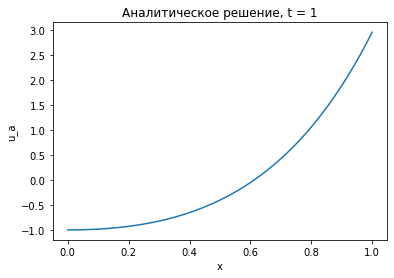

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
x,0.0,0.020000,0.040000,0.060000,0.080000,0.100000,0.120000,0.140000,0.160000,0.180000,...,0.82000,0.840000,0.860000,0.88000,0.900000,0.920000,0.940000,0.960000,0.980000,1.000000
u_an,-1.0,-0.999389,-0.997513,-0.994303,-0.989687,-0.983593,-0.975942,-0.966653,-0.955643,-0.942824,...,1.20548,1.362203,1.527365,1.70133,1.884481,2.077214,2.279943,2.493098,2.717125,2.952492


In [36]:
def u_an(x):
    u_an = math.exp(x)*(x - 1) + (math.exp(x) - 1)**2
    return u_an
L = 50
h = 1/L
x = []
k = 0
for i in range(L+1):
    x.append(k)
    k += h

y = []    
for i in range(len(x)):
    y.append(u_an(x[i]))

plt.figure()
plt.title('Аналитическое решение, t = 1')
plt.xlabel('x')
plt.ylabel('u_a')
plt.plot(x, y)
plt.show() 

df =pd.DataFrame({"x": x, "u_an": y})
df.T


Проделав необходимые вычисления, убедились, что разностная схема аппроксимирует со вторым порядком. Получили дополнительное условие: $[u]_{1}^{n} = (t^{n} - 1)^{2} - 1 + he^{x}(2(t^{n} - 1) + x)$

In [37]:
def u_analit(x, t):
    u_analit = math.exp(x)*(x - 1) + (math.exp(x) - t)**2
    return u_analit

In [273]:
#Зададим сетку
L = 20
M = 20
h = 1/L
tau = 1/M
x = []
t = []
k = 0
s = 0
for i in range(L+1):
    x.append(k)
    k += h
for i in range(M+1):
    t.append(s)
    s += tau

#print(x)    
net = []

In [274]:
for i in range(L+1):
    arr = []
    for j in range(M+1):
        arr.append(u_analit(x[i], t[j]))
    net.append(arr)

In [275]:
#задали сетку для решения разностной схемы
net_diff = []
for i in range(L+1):
    arr = []
    for j in range(M+1):
        arr.append(0)
    net_diff.append(arr)
#посчитаем значения сеточной функции с помощью граничных условий
for i in range(2):
    for j in range(M+1):
        if (i==0):
            net_diff[i][j] = (t[j] - 1)**2 - 1
        if (i==1):
            net_diff[i][j] = (t[j] - 1)**2 - 1 + h*(math.exp(x[i]))*(x[i] - 2*(t[j] - 1))

for j in range(1):
    for i in range(M+1):
        net_diff[i][j] = math.exp(2*x[i]) + (x[i] - 1)*(math.exp(x[i]))
            
#посчитаем сеточную функцию во внутренних точках

for i in range(2, L+1):
    for j in range(0, M):
        net_diff[i][j+1] = net_diff[i][j] + (tau/(2*h))*(math.exp(-x[i]))*(1 + (tau/2)*(math.exp(-x[i])))*(- net_diff[i-2][j] + 4*net_diff[i-1][j] - 3*net_diff[i][j]) + ((tau**2)/(2*(h**2)))*(math.exp(-2*x[i]))*(net_diff[i-2][j] - 2*net_diff[i-1][j] + net_diff[i][j]) + tau*(x[i] - tau/2*(math.exp(-x[i])))
            
#print(net_diff)

In [276]:
#построим графики аналитического и численных методов на одном из временных слоев, и найдем максимальное расхождение сеточных функций
max_diff = []
for i in range(L+1):
    max_elem = 0
    for j in range(M+1):
        s = abs(net_diff[i][j] - net[i][j])
        if (s > max_elem):
            max_elem = s
    max_diff.append(max_elem)
#print(max_diff)

In [277]:
#разность аналитического и разностного решений на 5 временном слое
abs_t = []
for i in range(L+1):
    s = abs(net_diff[i][5] - net[i][5])
    abs_t.append(s)
#print(abs_t)

max error = 0.005036027513881436


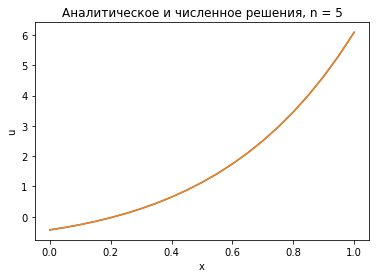

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
x,0.0000,0.050000,0.100000,0.150000,0.200000,0.250000,0.300000,0.350000,0.400000,0.450000,...,0.550000,0.600000,0.650000,0.700000,0.750000,0.800000,0.850000,0.900000,0.950000,1.000000
u_an,-0.4375,-0.356672,-0.263337,-0.156117,-0.033499,0.106189,0.264788,0.444325,0.647034,0.875375,...,1.420076,1.742710,2.103587,2.506698,2.956439,3.457654,4.015677,4.636386,5.326254,6.092415
u_diff,-0.4375,-0.356026,-0.262665,-0.155434,-0.032804,0.106558,0.263897,0.444051,0.646829,0.875317,...,1.420318,1.743113,2.104158,2.507443,2.957366,3.458771,4.016992,4.637908,5.327993,6.094380
abs,0.0000,0.000646,0.000671,0.000684,0.000695,0.000368,0.000892,0.000274,0.000205,0.000059,...,0.000243,0.000403,0.000571,0.000745,0.000927,0.001117,0.001315,0.001522,0.001738,0.001964
max diff,0.0000,0.001293,0.001352,0.001327,0.001276,0.001199,0.001092,0.000953,0.000924,0.000792,...,0.000530,0.000694,0.000917,0.001181,0.001552,0.002059,0.002675,0.003384,0.004237,0.005036


In [278]:
analyt_t = []
diff_t = []

for i in range(L+1):
    analyt_t.append(net[i][5])

for i in range(L+1):
    diff_t.append(net_diff[i][5])
    
max_d = max(max_diff)
print('max error =', max_d)

plt.figure()
plt.title('Аналитическое и численное решения, n = 5')
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x, analyt_t)
plt.plot(x, diff_t)
plt.show() 

df =pd.DataFrame({"x": x, "u_an": analyt_t, "u_diff": diff_t, "abs": abs_t, "max diff": max_diff})
df.T

Проверим схему на апроксимацию увеличивая шаг по x и t в два раза. Найдем ошибку как норму разности численного решения и аналитического, затем построим график  log(𝑒𝑟𝑟)  от  log(ℎ+𝜏)  и убедимся, что его коэффицент наклона должен быть близок к 2, т.к. наша схема аппроксимирует дифф задачу со вторым порядком

In [279]:
err = [0.018927608721494682, 0.005036027513881436, 0.0012806701403049736, 0.0003233470084937906, 8.119692218544472e-05, 2.03444617561388e-05]
hplust = [0.2, 0.1, 0.05, 0.025, 0.0125, 0.00625]

x = np.log(hplust)
y = np.log(err)

In [280]:
z = np.polyfit(x, y, deg=1)
z

array([ 1.97594564, -0.75857908])

Следовательно, получаем, что порядок аппроксимации почти равен 2, что совпадает с данными, полученными при расчете

С помощью спектрального признака с использованием принципа замороженных коэффициентов, получили: $\tau < \frac{2h}{max(a)} \leftrightarrow \tau < h \leftrightarrow \frac{\tau}{h}<1$